In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras

2025-02-10 17:03:07.454239: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-10 17:03:07.551564: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-10 17:03:07.647217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739187187.737025    6127 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739187187.761485    6127 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-10 17:03:07.959128: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [8]:
df=pd.read_csv("./music/high_popularity_spotify_data.csv")

In [9]:
df

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.000000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4,0.0358,...,0.060800,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4,0.0368,...,0.000000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4,0.0634,...,0.000000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.000000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,...,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.5510,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,...,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.4240,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,...,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.1820,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,...,0.000000,6tE9Dnp2zInFij4jKssysL,1,1,189893,0.3140,59nOXPmaKlBfGMDeOVGrIK,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh


In [10]:
df=df.drop(['track_artist',"track_href","uri","track_album_name","analysis_url","track_id","track_name","track_album_id","id"],axis=1)

In [11]:
df

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,time_signature,speechiness,track_popularity,playlist_name,track_album_release_date,instrumentalness,mode,key,duration_ms,acousticness,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,3,0.0304,100,Today's Top Hits,2024-08-16,0.000000,0,6,251668,0.3080,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,4,0.0358,97,Today's Top Hits,2024-05-17,0.060800,1,2,210373,0.2000,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,4,0.0368,93,Today's Top Hits,2024-10-18,0.000000,1,1,166300,0.2140,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,4,0.0634,81,Today's Top Hits,2024-08-23,0.000000,0,0,157280,0.0939,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,4,0.2600,98,Today's Top Hits,2024-10-18,0.000000,0,0,169917,0.0283,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,5,0.0678,76,Afro-Latin Party,2022-12-06,0.000013,0,10,184791,0.5510,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,4,0.0941,74,Afro-Latin Party,2022-07-14,0.129000,0,3,183057,0.4240,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,4,0.0929,69,Afro-Latin Party,2023-03-30,0.000000,0,6,194040,0.1820,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,4,0.3400,82,Afro-Latin Party,2022-04-29,0.000000,1,1,189893,0.3140,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh


In [70]:
date=df["track_album_release_date"]
df=df.drop(["track_album_release_date"],axis=1)

KeyError: 'track_album_release_date'

In [16]:
df=pd.get_dummies(df)

In [18]:
df.replace({True:1,False:0},inplace=True)

/tmp/ipykernel_6127/3368332301.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True:1,False:0},inplace=True)


In [19]:
df

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,...,playlist_id_5arFyak5nEhUf9kpsssXxT,playlist_id_5d29bl04zUgpD8rxNJO4os,playlist_id_5pMia1lBFZyj4VVa0wzrNV,playlist_id_652TD735fW0JesE9VgHhzS,playlist_id_6G1N7RXO7gOGfFKlRyjl8G,playlist_id_6JH5nqQdmdNPuwEoCImWnj,playlist_id_6OYaw7arTfoGEHpGdItkLQ,playlist_id_6mODZNt8CYYEBrWAyS5vs4,playlist_id_71R43lBYQZ6JQXH6LmRo1I,playlist_id_72GgLgQ63eUHG3CyCv42Ju
0,0.592,157.969,0.521,-7.777,0.1220,0.535,3,0.0304,100,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.507,104.978,0.747,-10.171,0.1170,0.438,4,0.0358,97,0.060800,...,0,0,0,0,0,0,0,0,0,0
2,0.808,108.548,0.554,-4.169,0.1590,0.372,4,0.0368,93,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.910,112.966,0.670,-4.070,0.3040,0.786,4,0.0634,81,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.783,149.027,0.777,-4.477,0.3550,0.939,4,0.2600,98,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,0.573,-7.621,0.1020,0.693,5,0.0678,76,0.000013,...,0,0,0,0,0,0,0,0,0,0
1682,0.725,105.016,0.711,-8.315,0.1100,0.530,4,0.0941,74,0.129000,...,0,0,0,0,0,0,0,0,0,0
1683,0.809,99.005,0.724,-5.022,0.0765,0.606,4,0.0929,69,0.000000,...,0,0,0,0,0,0,0,0,0,0
1684,0.642,83.389,0.463,-4.474,0.0686,0.339,4,0.3400,82,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df2=pd.read_csv("./music/high_popularity_spotify_data.csv")

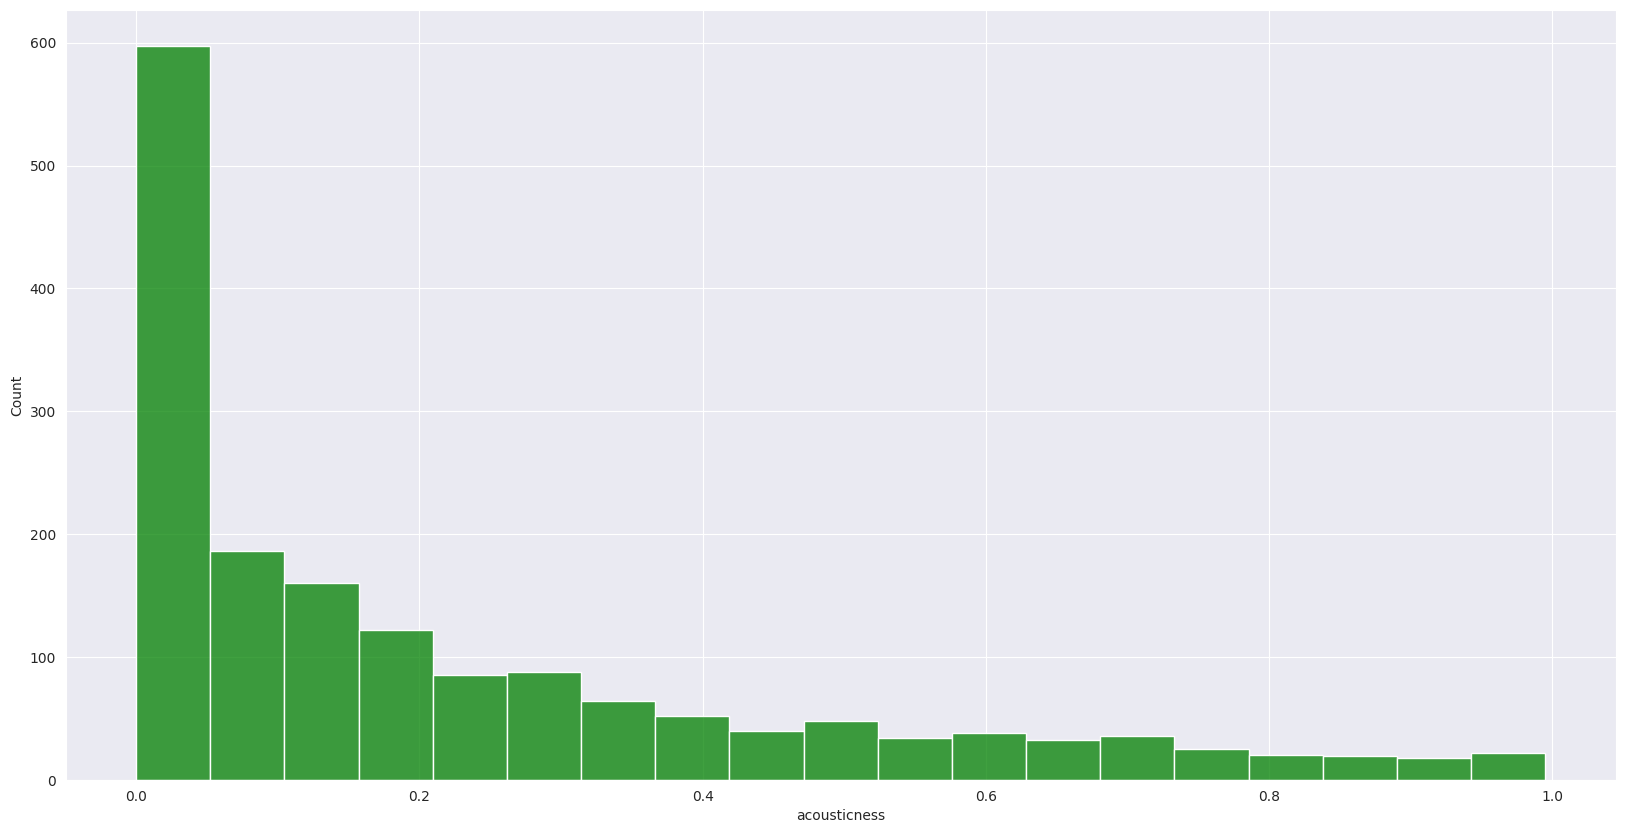

In [59]:
plt.figure(figsize=(20,10))
sns.histplot(df2["acousticness"],color="g")
plt.show()

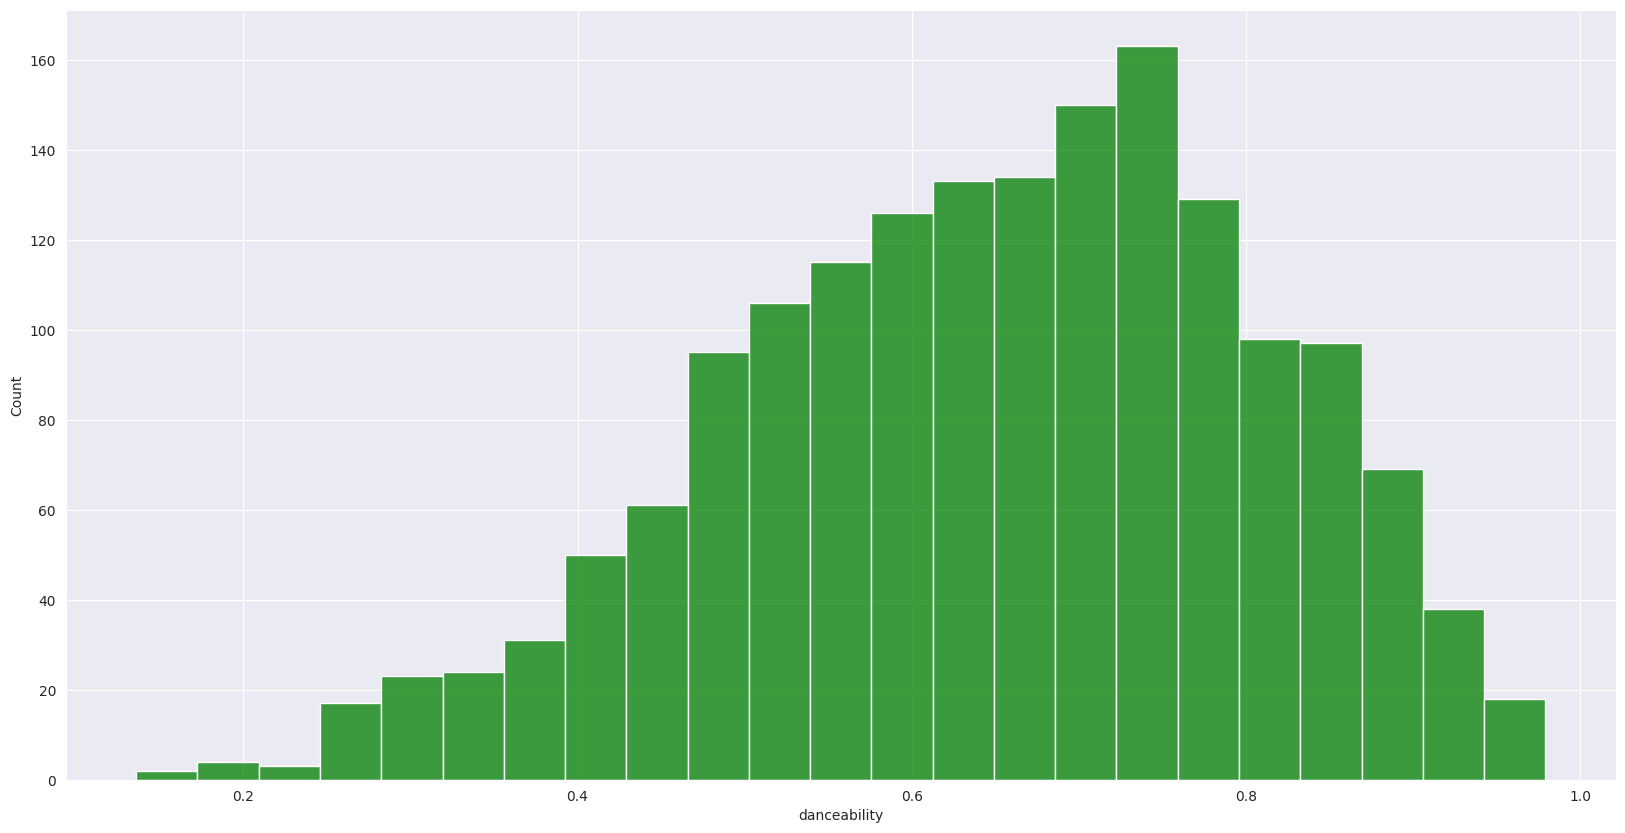

In [60]:
plt.figure(figsize=(20,10))
sns.histplot(df2["danceability"],color="green")
plt.show()

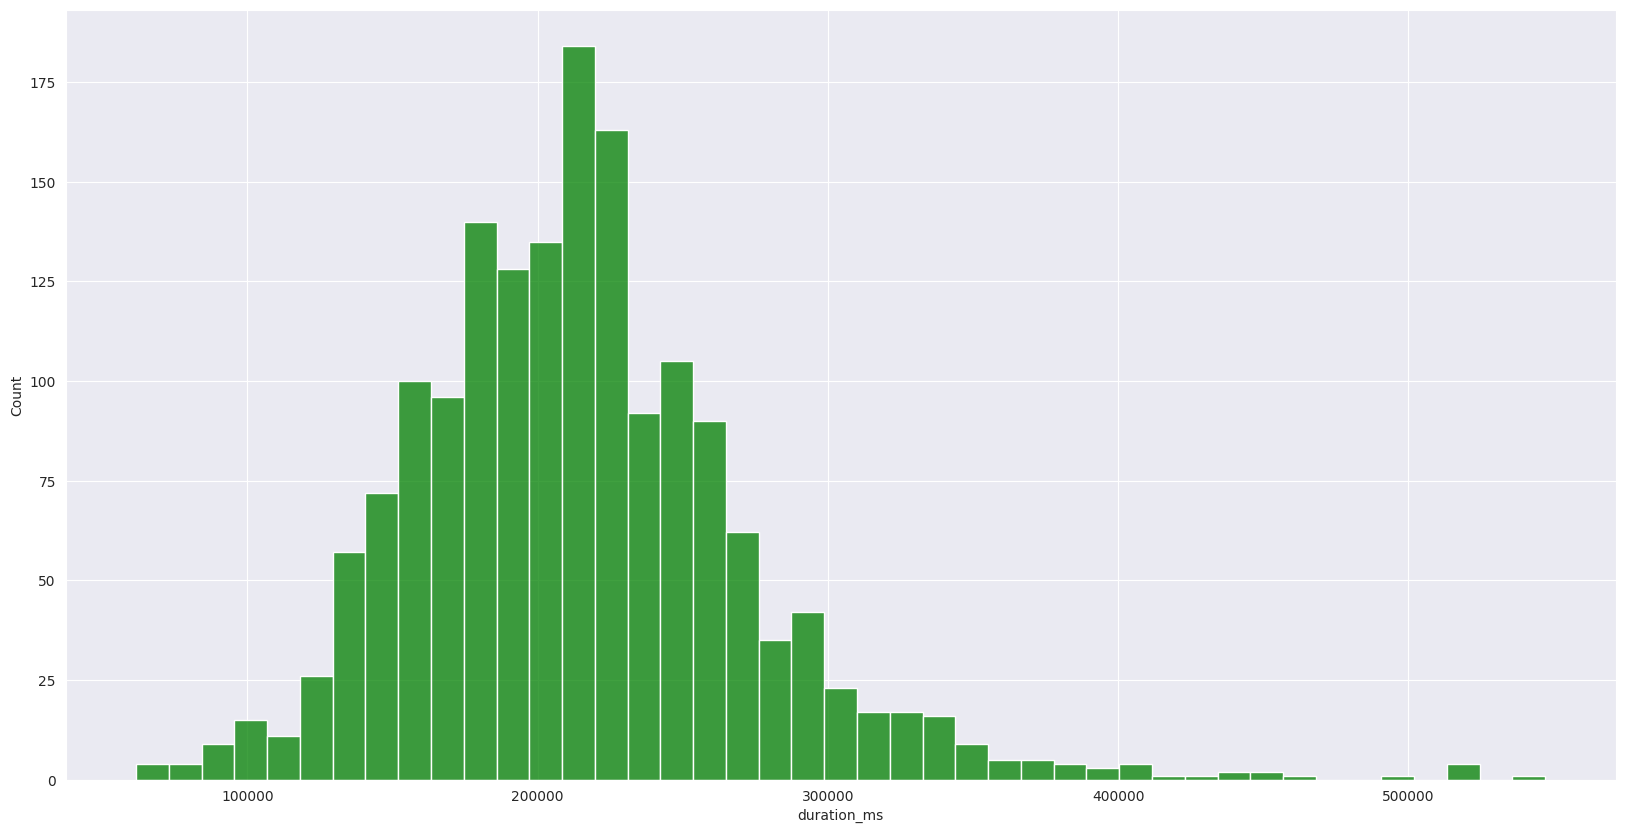

In [61]:
plt.figure(figsize=(20,10))
sns.histplot(df2["duration_ms"],color="green")
plt.show()

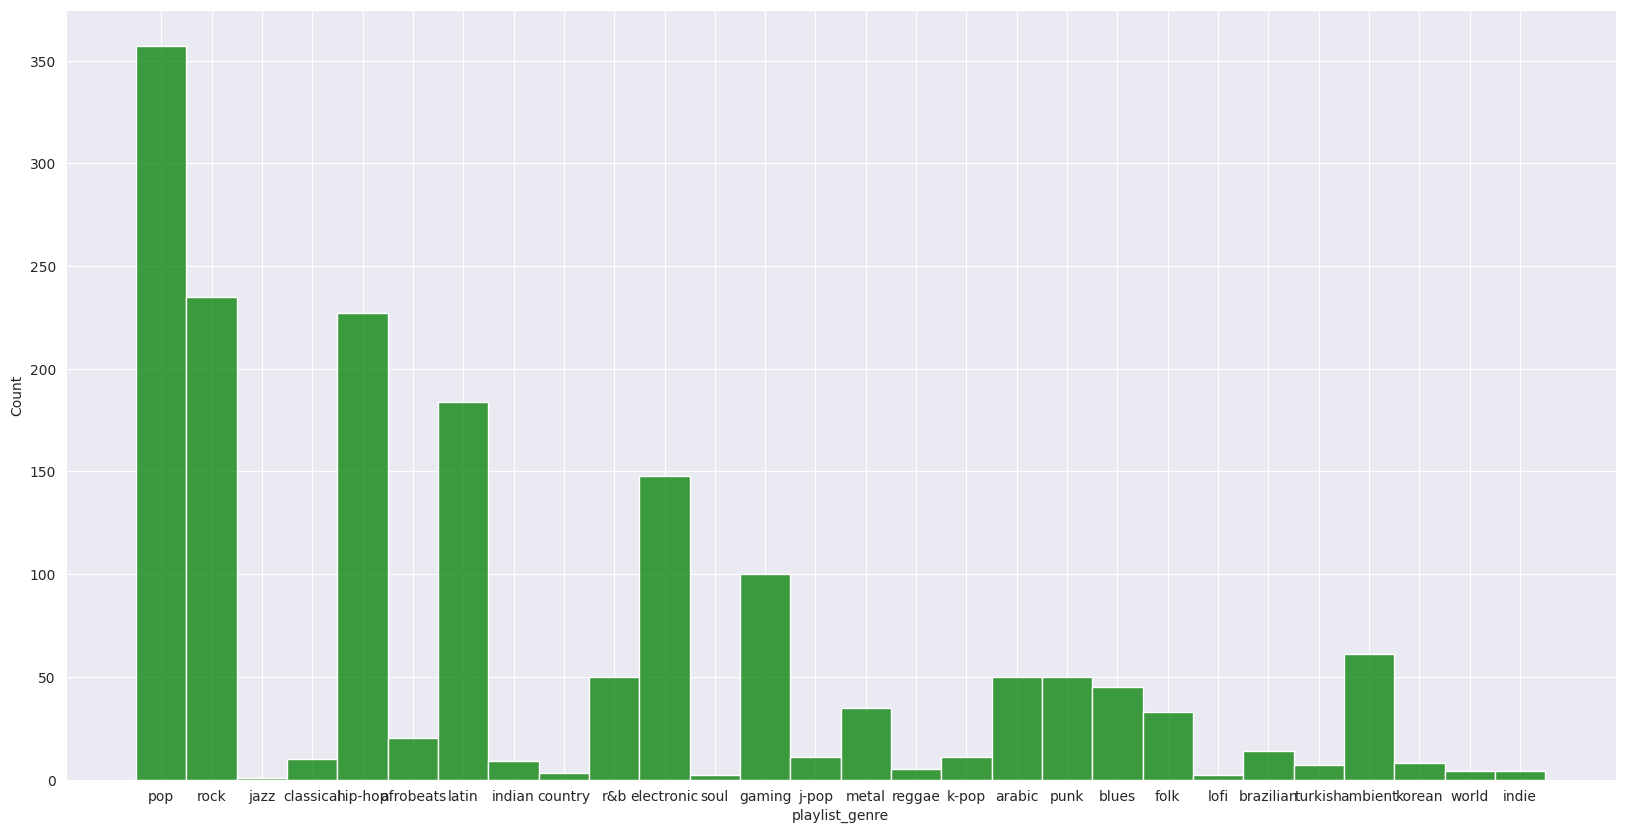

In [62]:
plt.figure(figsize=(20,10))
sns.histplot(df2["playlist_genre"],color="green")
plt.show()

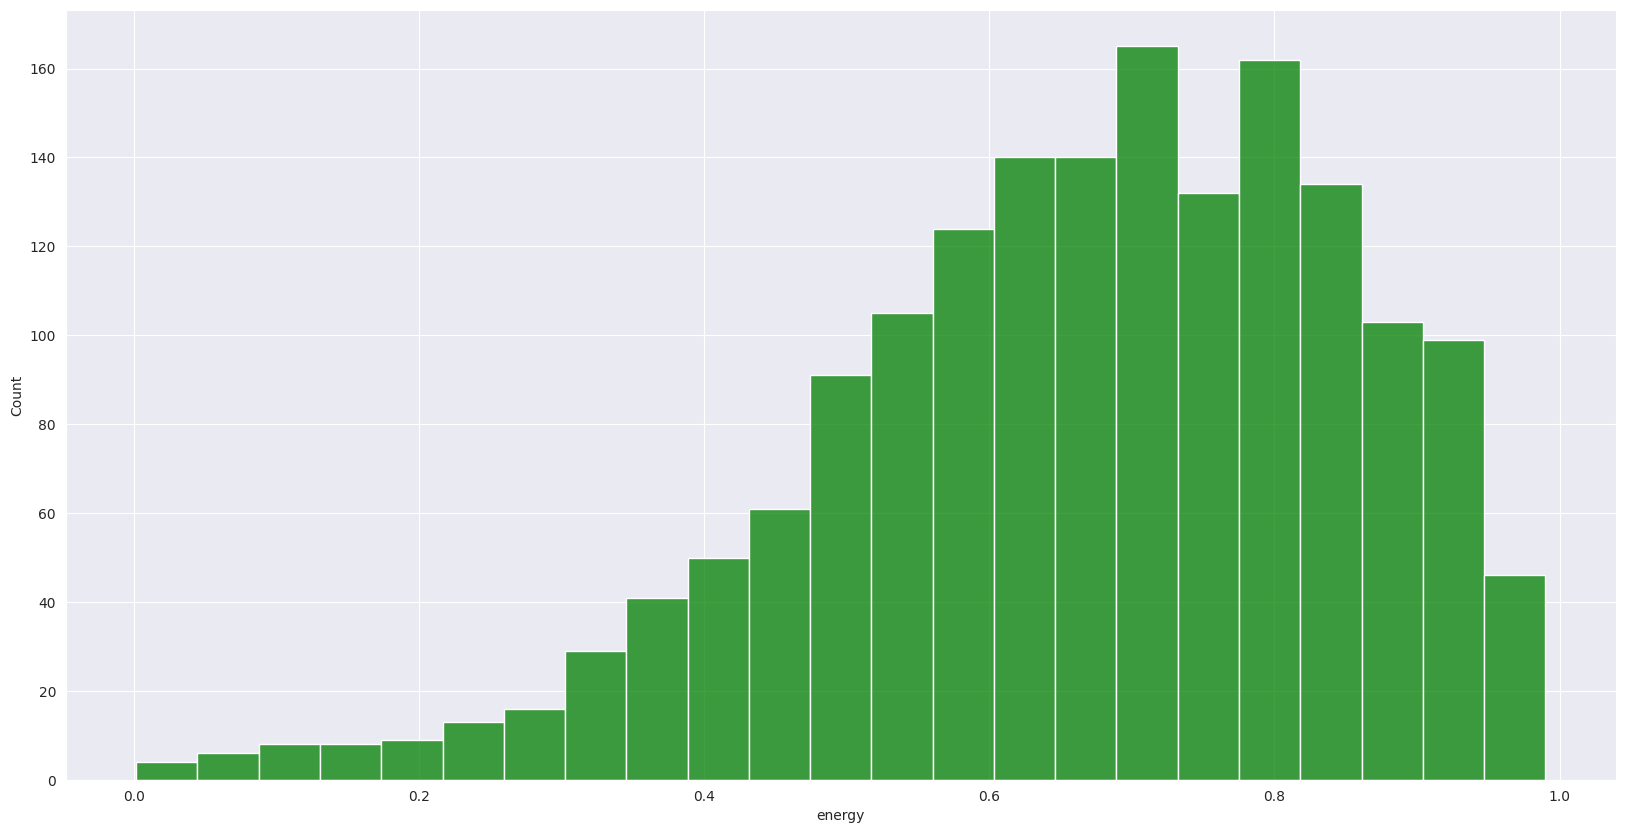

In [63]:
plt.figure(figsize=(20,10))
sns.histplot(df2["energy"],color="green")
plt.show()

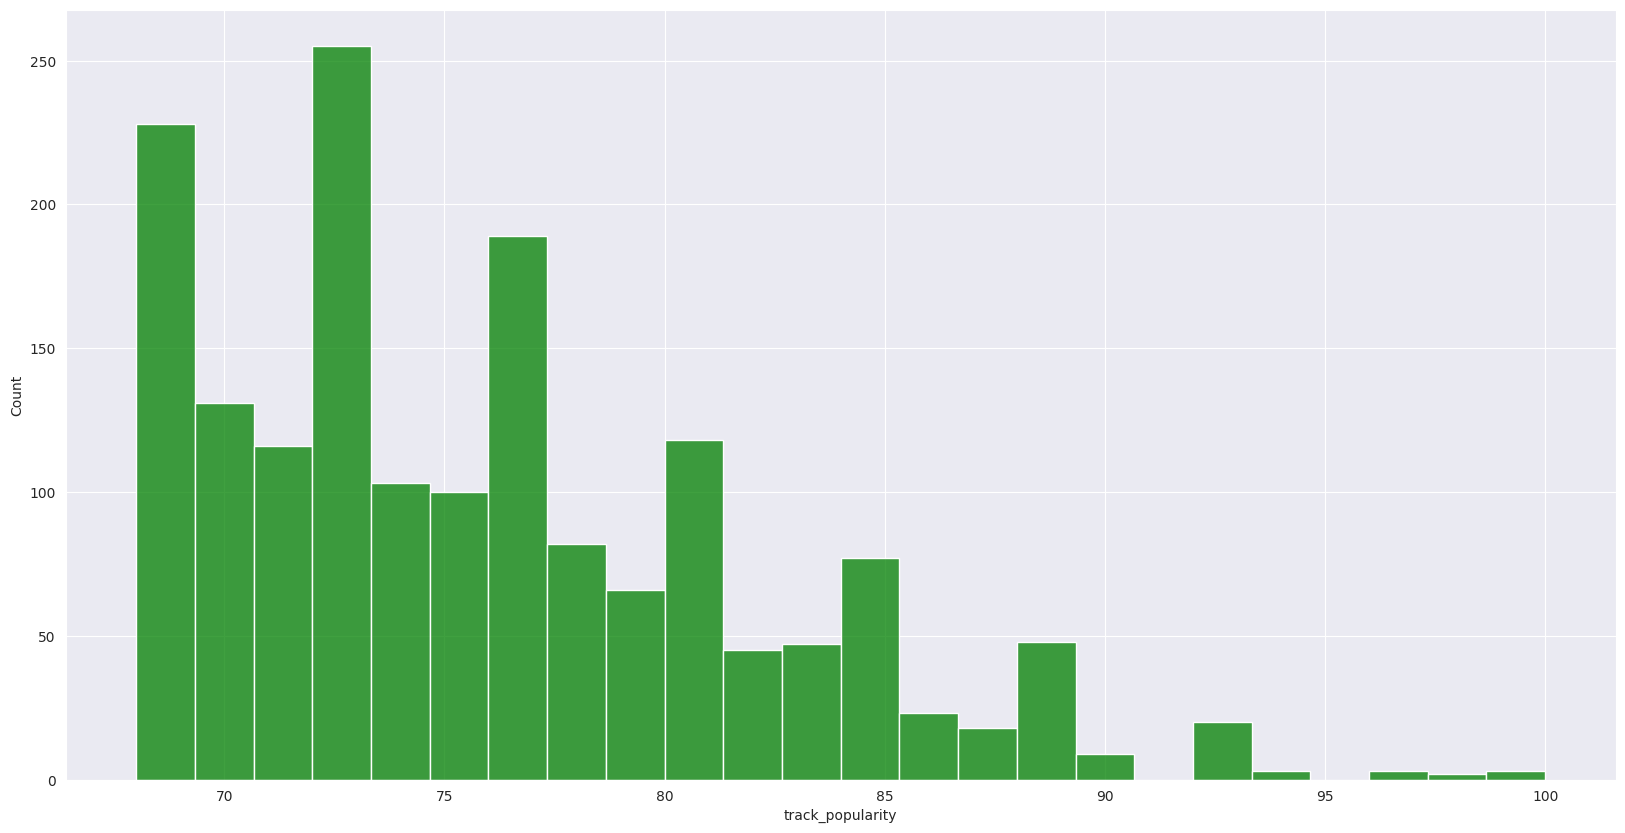

In [64]:
plt.figure(figsize=(20,10))
sns.histplot(df2["track_popularity"],color="green")
plt.show()

In [269]:
model=keras.Sequential([
    keras.layers.Input(shape=(240,)),
    #keras.layers.Dense(240,activation=tf.nn.relu,input_shape=(240,)),
    keras.layers.Dense(240*2,activation="relu"),
    keras.layers.Dense(1)
])

In [270]:
model.compile(loss="mse",optimizer=keras.optimizers.Adam(learning_rate=0.011),metrics=["accuracy"])

In [271]:
x=df.drop(["track_popularity"],axis=1)

In [272]:
y=df["track_popularity"]/100

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [275]:
x_train

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,instrumentalness,mode,...,playlist_id_5arFyak5nEhUf9kpsssXxT,playlist_id_5d29bl04zUgpD8rxNJO4os,playlist_id_5pMia1lBFZyj4VVa0wzrNV,playlist_id_652TD735fW0JesE9VgHhzS,playlist_id_6G1N7RXO7gOGfFKlRyjl8G,playlist_id_6JH5nqQdmdNPuwEoCImWnj,playlist_id_6OYaw7arTfoGEHpGdItkLQ,playlist_id_6mODZNt8CYYEBrWAyS5vs4,playlist_id_71R43lBYQZ6JQXH6LmRo1I,playlist_id_72GgLgQ63eUHG3CyCv42Ju
1301,0.888,123.031,0.671,-4.285,0.0951,0.412,4,0.0412,0.010600,0,...,0,0,0,0,0,0,0,0,0,0
1654,0.807,155.397,0.525,-6.366,0.0504,0.741,4,0.0725,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
694,0.872,184.115,0.466,-3.344,0.1210,0.806,4,0.0336,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
426,0.634,113.927,0.704,-7.374,0.0952,0.411,4,0.0428,0.000032,0,...,0,0,0,0,0,0,0,0,0,0
1483,0.415,113.976,0.823,-10.845,0.1280,0.488,4,0.0637,0.031600,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.629,130.017,0.848,-6.198,0.0490,0.586,4,0.0424,0.180000,1,...,0,0,0,0,0,0,0,0,0,0
1380,0.694,90.020,0.869,-3.350,0.0878,0.511,4,0.0783,0.001250,0,...,0,0,0,0,0,0,0,0,0,0
1444,0.803,67.536,0.284,-5.293,0.2420,0.553,4,0.1730,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
1468,0.630,95.000,0.874,-3.585,0.0582,0.717,4,0.2980,0.004790,1,...,0,0,0,0,0,0,0,0,0,0


In [276]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 2.9302e-04 - loss: 590205888.0000
Epoch 2/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0021 - loss: 5765843.0000
Epoch 3/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0020 - loss: 55844.1680
Epoch 4/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0011 - loss: 475.9113    
Epoch 5/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0012 - loss: 9.8145     


In [277]:
y_train

1301    0.69
1654    0.68
694     0.79
426     0.74
1483    0.70
        ... 
530     0.77
1380    0.68
1444    0.72
1468    0.74
1103    0.69
Name: track_popularity, Length: 1348, dtype: float64

In [278]:
model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[-1.75519839e-01],
       [ 1.37977803e+00],
       [ 1.07472432e+00],
       [ 6.13710213e+00],
       [ 9.30348560e-02],
       [ 4.09694099e+00],
       [ 7.85905957e-01],
       [ 3.11036873e+00],
       [-8.10041308e-01],
       [ 3.39869881e+00],
       [ 3.02385449e-01],
       [ 4.47377205e+00],
       [ 2.29054451e+00],
       [ 1.31447041e+00],
       [ 3.73951912e+00],
       [ 4.74870801e-01],
       [ 3.85902596e+00],
       [ 1.90358174e+00],
       [ 3.50367928e+00],
       [-2.38865471e+00],
       [ 3.66960645e-01],
       [ 7.98512623e-02],
       [ 2.69182324e-01],
       [ 1.92067158e+00],
       [-1.48191631e+00],
       [-1.77317607e+00],
       [ 2.99501228e+00],
       [ 3.33058357e+00],
       [-6.70637012e-01],
       [-2.15803042e-01],
       [-4.11359668e-01],
       [ 3.30287361e+00],
       [ 1.13966572e+00],
       [ 3.15992928e+00],
       [ 6.08766365e+00],
       [ 2.78956795e+00],
       [ 4.64784431e+00],
       [ 6.69206738e-01],
       [ 1.4

In [265]:
import sklearn

In [266]:
model2=sklearn.ensemble.RandomForestRegressor()

In [267]:
model2.fit(x_train,y_train)

RandomForestRegressor()

In [268]:
model2.predict(x_test)

array([0.7304, 0.7779, 0.7439, 0.7295, 0.7629, 0.7792, 0.7608, 0.7721,
       0.7527, 0.7674, 0.7411, 0.782 , 0.779 , 0.766 , 0.7542, 0.7468,
       0.7177, 0.8823, 0.8431, 0.8773, 0.7244, 0.7221, 0.7306, 0.7441,
       0.7142, 0.7474, 0.7785, 0.7739, 0.7347, 0.7859, 0.7378, 0.7442,
       0.7359, 0.7508, 0.7925, 0.7645, 0.7646, 0.7408, 0.7588, 0.7411,
       0.7469, 0.7393, 0.7865, 0.7346, 0.7112, 0.7639, 0.7516, 0.7646,
       0.7649, 0.7196, 0.7644, 0.7554, 0.7632, 0.7736, 0.7248, 0.7687,
       0.7723, 0.7314, 0.7442, 0.8865, 0.7353, 0.817 , 0.8068, 0.7417,
       0.7933, 0.7352, 0.7552, 0.7252, 0.7763, 0.7572, 0.7854, 0.7602,
       0.7217, 0.7438, 0.7341, 0.7599, 0.8093, 0.7356, 0.7827, 0.7355,
       0.7398, 0.8012, 0.7578, 0.7588, 0.7776, 0.7303, 0.7242, 0.7556,
       0.732 , 0.7416, 0.7112, 0.7353, 0.7706, 0.7797, 0.7427, 0.7534,
       0.7292, 0.7294, 0.7135, 0.7403, 0.7279, 0.7412, 0.7754, 0.7694,
       0.767 , 0.7888, 0.8061, 0.812 , 0.7631, 0.7332, 0.7672, 0.783 ,
      

In [141]:
y_test.to_numpy()

array([0.72, 0.79, 0.75, 0.93, 0.72, 0.78, 0.76, 0.74, 0.69, 0.73, 0.81,
       0.69, 0.75, 0.68, 0.72, 0.73, 0.75, 0.87, 0.72, 0.8 , 0.72, 0.69,
       0.72, 0.73, 0.74, 0.75, 0.7 , 0.68, 0.73, 0.76, 0.74, 0.69, 0.74,
       0.72, 0.76, 0.78, 0.71, 0.68, 0.75, 0.8 , 0.77, 0.68, 0.69, 0.71,
       0.78, 0.78, 0.72, 0.72, 0.68, 0.7 , 0.79, 0.76, 0.86, 0.8 , 0.82,
       0.74, 0.7 , 0.75, 0.87, 0.77, 0.69, 0.84, 0.73, 0.68, 0.78, 0.7 ,
       0.8 , 0.75, 0.76, 0.74, 0.84, 0.69, 0.68, 0.81, 0.87, 0.75, 0.75,
       0.74, 0.72, 0.82, 0.75, 0.68, 0.78, 0.73, 0.73, 0.82, 0.73, 0.75,
       0.73, 0.68, 0.88, 0.87, 0.79, 0.93, 0.73, 0.76, 0.78, 0.71, 0.83,
       0.78, 0.87, 0.68, 0.77, 0.73, 0.83, 0.75, 0.76, 0.76, 0.77, 0.75,
       0.84, 0.82, 0.93, 0.74, 0.81, 0.77, 0.97, 0.68, 0.77, 0.69, 0.87,
       0.77, 0.85, 0.78, 0.78, 0.71, 0.8 , 0.68, 0.7 , 0.84, 0.74, 0.87,
       0.71, 0.78, 0.72, 0.74, 0.86, 0.79, 0.75, 0.78, 0.85, 0.68, 0.74,
       0.72, 0.84, 0.73, 0.76, 0.77, 0.73, 0.75, 0.

In [283]:
plt.figure(figsize=(20,10))
sns.displot(x=y_test,model.predict(x_test),color="green")
#sns.displot(model.predict(x_test),color="green")
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


TypeError: displot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 2000x1000 with 0 Axes>

/tmp/ipykernel_6127/1256466171.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2.predict(x_test))


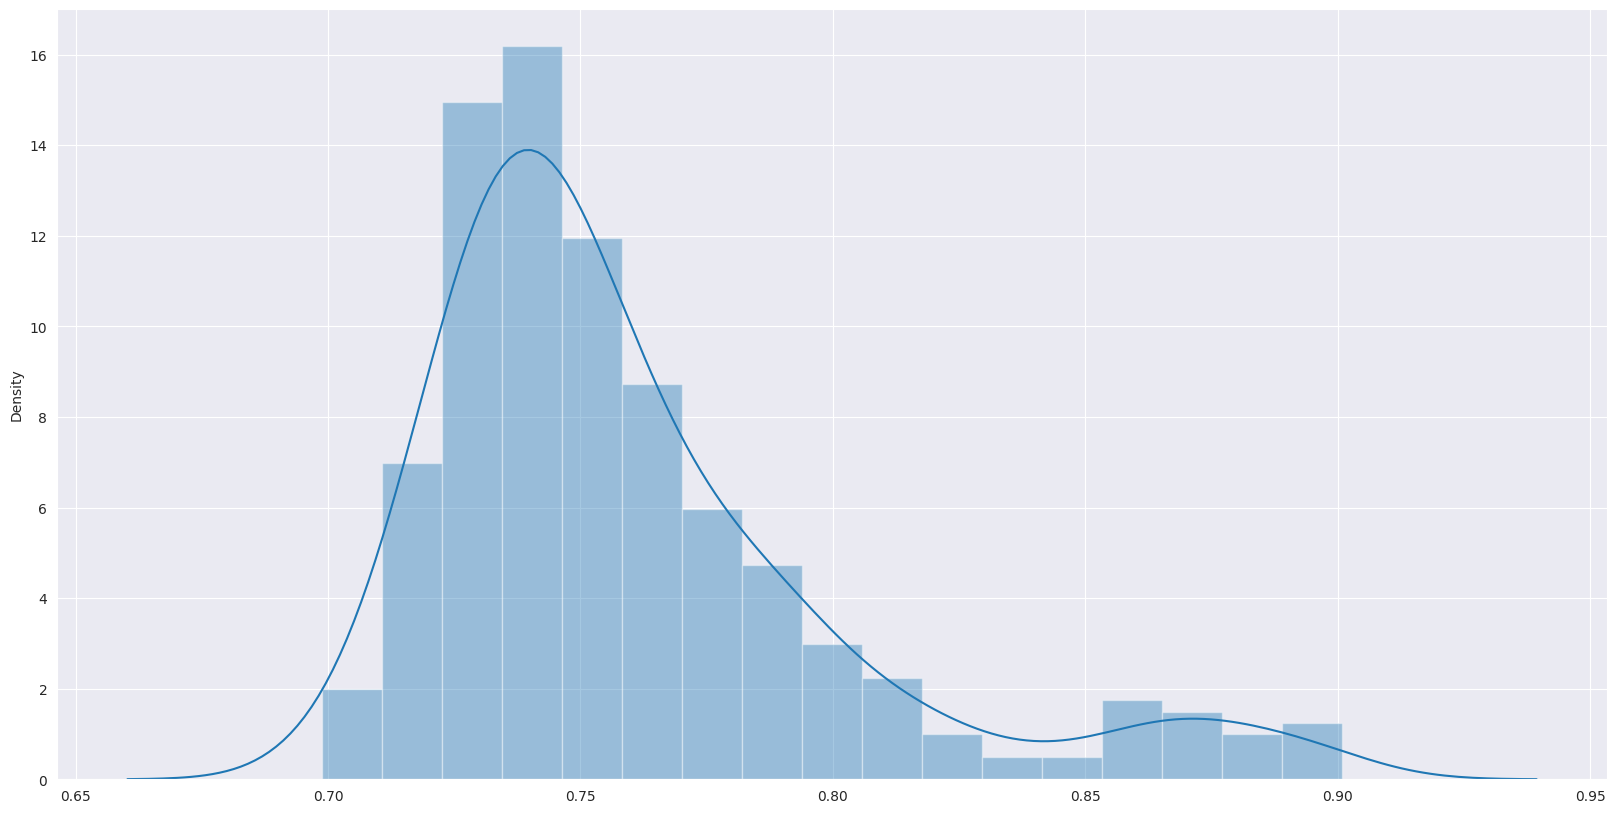

In [153]:
plt.figure(figsize=(20,10))
sns.distplot(model2.predict(x_test))
plt.show()